In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [2]:
input_dir = './Assignment_1__Output_FE__Flike/'
output_dir = './Assignment_1__Output_FE__2nd/'
arg_skip_row_ind_GEV = {'c1':[100,99,99], 'c2':[98,98,98], 'c3':[99,98,98], 'full':[128]}
arg_skip_row_ind_LP3 = {'c1':[100,100,100], 'c2':[98,98,98], 'c3':[99,98,99], 'full':[137]}

print(
    input_dir,
    output_dir,
    arg_skip_row_ind_GEV,
    arg_skip_row_ind_LP3,
    sep='\n'
    )

./Assignment_1__Output_FE__Flike/
./Assignment_1__Output_FE__2nd/
{'c1': [100, 99, 99], 'c2': [98, 98, 98], 'c3': [99, 98, 98], 'full': [128]}
{'c1': [100, 100, 100], 'c2': [98, 98, 98], 'c3': [99, 98, 99], 'full': [137]}


In [3]:
def create_output_dir(arg_output_dir):
    """create output directory if it does not exist

    arguments:
        [string] --> arg_output_dir = path of the output directory name
    """
    if not os.path.exists(arg_output_dir):
        os.makedirs(arg_output_dir)

In [4]:
create_output_dir(output_dir)
output_dir

'./Assignment_1__Output_FE__2nd/'

In [5]:
def list_files(arg_directory_path, arg_regex, arg_column_name='file_path'):
    """return list of files in a directory

    arguments:
        [string] --> arg_directory_path = directory path of the polygons
        [string] --> arg_regex = regex entry
        [string] --> arg_column_name = column's name
    """
    list_files = glob.glob(pathname=arg_directory_path + arg_regex)
    list_files = pd.DataFrame(list_files, columns=[arg_column_name])
    list_files.sort_values(by=[arg_column_name], inplace=True)
    list_files.reset_index(drop=True, inplace=True)

    return list_files

In [6]:
arg_skip_row_ind_GEV = list(ind2 for ind1 in arg_skip_row_ind_GEV.values() for ind2 in ind1)
arg_skip_row_ind_LP3 = list(ind2 for ind1 in arg_skip_row_ind_LP3.values() for ind2 in ind1)

print(arg_skip_row_ind_LP3, arg_skip_row_ind_GEV)

[100, 100, 100, 98, 98, 98, 99, 98, 99, 137] [100, 99, 99, 98, 98, 98, 99, 98, 98, 128]


In [7]:
results = list_files(input_dir, '*.txt', 'file_name')
results.file_name = results.file_name.str.split(pat='/').str[-1]
results['data_case'] = results.file_name.str.split(pat='__').str[1]
results['prob_fit'] = results.file_name.str.split(pat='__').str[-1].str.split(pat='.').str[0]
results.sort_values(by=['prob_fit', 'data_case'], inplace=True)
results.reset_index(drop=True, inplace=True)
results = pd.concat(objs=[results, pd.Series(data=arg_skip_row_ind_GEV + arg_skip_row_ind_LP3, name='skip_row_ind')], axis=1)
results

,file_name,data_case,prob_fit,skip_row_ind
0,results__data_case_1_0_1960_1970__Bayes__NoInf...,data_case_1_0_1960_1970,GEV,100
1,results__data_case_1_1_1970_1980__Bayes__NoInf...,data_case_1_1_1970_1980,GEV,99
2,results__data_case_1_2_1980_1990__Bayes__NoInf...,data_case_1_2_1980_1990,GEV,99
3,results__data_case_2_0_1960_1969__Bayes__NoInf...,data_case_2_0_1960_1969,GEV,98
4,results__data_case_2_1_1970_1979__Bayes__NoInf...,data_case_2_1_1970_1979,GEV,98
5,results__data_case_2_2_1980_1989__Bayes__NoInf...,data_case_2_2_1980_1989,GEV,98
6,results__data_case_3_0_1961_1970__Bayes__NoInf...,data_case_3_0_1961_1970,GEV,99
7,results__data_case_3_1_1971_1980__Bayes__NoInf...,data_case_3_1_1971_1980,GEV,98
8,results__data_case_3_2_1981_1990__Bayes__NoInf...,data_case_3_2_1981_1990,GEV,98
9,results__full_data__Bayes__NoInf__GEV.txt,full_data,GEV,128


In [8]:
def func_read_table(arg_input_dir, arg_output_dir, arg_file_name, arg_data_case, arg_prob_fit, arg_skip_row_ind):
    df = pd.read_table(
        filepath_or_buffer='{}{}'.format(arg_input_dir, arg_file_name), 
        sep='\s+', header=None, names=['ARI', 'flow_rate', 'lower_5', 'upper_95'], 
        skiprows=arg_skip_row_ind, nrows=12
        )
    df['diff_perc_lower'] = 100*df.lower_5/df.flow_rate
    df['diff_perc_upper'] = 100*df.upper_95/df.flow_rate
    df.to_csv(path_or_buf='{}{}_{}.csv'.format(arg_output_dir, arg_prob_fit, arg_data_case), index=False)

    return df

In [9]:
results['df'] = results.apply(func=lambda arg: func_read_table(input_dir, output_dir, arg.file_name, arg.data_case, arg.prob_fit, arg.skip_row_ind), axis=1)
results

,file_name,data_case,prob_fit,skip_row_ind,df
0,results__data_case_1_0_1960_1970__Bayes__NoInf...,data_case_1_0_1960_1970,GEV,100,ARI flow_rate lower_5 upper_95 diff...
1,results__data_case_1_1_1970_1980__Bayes__NoInf...,data_case_1_1_1970_1980,GEV,99,ARI flow_rate lower_5 upper_95 diff...
2,results__data_case_1_2_1980_1990__Bayes__NoInf...,data_case_1_2_1980_1990,GEV,99,ARI flow_rate lower_5 upper_95 diff...
3,results__data_case_2_0_1960_1969__Bayes__NoInf...,data_case_2_0_1960_1969,GEV,98,ARI flow_rate lower_5 upper_95 diff...
4,results__data_case_2_1_1970_1979__Bayes__NoInf...,data_case_2_1_1970_1979,GEV,98,ARI flow_rate lower_5 upper_95 diff...
5,results__data_case_2_2_1980_1989__Bayes__NoInf...,data_case_2_2_1980_1989,GEV,98,ARI flow_rate lower_5 upper_95 diff...
6,results__data_case_3_0_1961_1970__Bayes__NoInf...,data_case_3_0_1961_1970,GEV,99,ARI flow_rate lower_5 upper_95 diff...
7,results__data_case_3_1_1971_1980__Bayes__NoInf...,data_case_3_1_1971_1980,GEV,98,ARI flow_rate lower_5 upper_95 diff...
8,results__data_case_3_2_1981_1990__Bayes__NoInf...,data_case_3_2_1981_1990,GEV,98,ARI flow_rate lower_5 upper_95 diff...
9,results__full_data__Bayes__NoInf__GEV.txt,full_data,GEV,128,ARI flow_rate lower_5 upper_95 diff...


In [10]:
def prepare_data(arg_output_dir, arg_prob_fit, arg_data_case, arg_df):
    df = arg_df.iloc[8:,:].copy()
    df.reset_index(drop=True, inplace=True)
    df.to_csv(path_or_buf='{}df_{}_{}.csv'.format(arg_output_dir, arg_prob_fit, arg_data_case), index=False)
    return df

In [11]:
results['df_data'] = results.apply(func=lambda arg: prepare_data(output_dir, arg.prob_fit, arg.data_case, arg.df), axis=1)
results

,file_name,data_case,prob_fit,skip_row_ind,df,df_data
0,results__data_case_1_0_1960_1970__Bayes__NoInf...,data_case_1_0_1960_1970,GEV,100,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
1,results__data_case_1_1_1970_1980__Bayes__NoInf...,data_case_1_1_1970_1980,GEV,99,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
2,results__data_case_1_2_1980_1990__Bayes__NoInf...,data_case_1_2_1980_1990,GEV,99,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
3,results__data_case_2_0_1960_1969__Bayes__NoInf...,data_case_2_0_1960_1969,GEV,98,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
4,results__data_case_2_1_1970_1979__Bayes__NoInf...,data_case_2_1_1970_1979,GEV,98,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
5,results__data_case_2_2_1980_1989__Bayes__NoInf...,data_case_2_2_1980_1989,GEV,98,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
6,results__data_case_3_0_1961_1970__Bayes__NoInf...,data_case_3_0_1961_1970,GEV,99,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
7,results__data_case_3_1_1971_1980__Bayes__NoInf...,data_case_3_1_1971_1980,GEV,98,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
8,results__data_case_3_2_1981_1990__Bayes__NoInf...,data_case_3_2_1981_1990,GEV,98,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
9,results__full_data__Bayes__NoInf__GEV.txt,full_data,GEV,128,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...


In [12]:
def plot_ffa(arg_output_dir, arg_prob_fit, arg_data_case, arg_df, arg_df_data):

    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(
        arg_df.ARI.to_numpy(),
        arg_df.flow_rate.to_numpy(),
        '-o',
        color='tab:blue',
        linewidth=0.5,
        markersize=3
        )

    ax.fill_between(
        x=arg_df.ARI.to_numpy(),
        y1=arg_df.upper_95.to_numpy(),
        y2=arg_df.lower_5.to_numpy(),
        color='tab:blue',
        alpha=0.2
        )

    for ind1, ind2 in zip(arg_df_data.ARI.to_numpy(), arg_df_data.flow_rate.to_numpy()):
        ax.annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -2.5),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_df_data.ARI.to_numpy(), arg_df_data.upper_95.to_numpy()):
        ax.annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, 2),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_df_data.ARI.to_numpy(), arg_df_data.lower_5.to_numpy()):
        ax.annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -7.5),
            textcoords='offset points',
            fontsize=8
            )

    ax.grid(visible=True, which='both')
    ax.set_xscale(value='log')
    ax.set_title(label='Flood Flow Rate vs Annual Recurrence Interval\n{}_{}'.format(arg_prob_fit, arg_data_case))
    ax.set_xlabel(xlabel='Annual Recurrence Interval in ($year$)')
    ax.set_ylabel(ylabel='Flow Rate in ($m^3/s$)')
    fig.savefig(fname='{}plot_{}_{}.png'.format(arg_output_dir, arg_prob_fit, arg_data_case), bbox_inches='tight')

,file_name,data_case,prob_fit,skip_row_ind,df,df_data
0,results__data_case_1_0_1960_1970__Bayes__NoInf...,data_case_1_0_1960_1970,GEV,100,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
1,results__data_case_1_1_1970_1980__Bayes__NoInf...,data_case_1_1_1970_1980,GEV,99,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
2,results__data_case_1_2_1980_1990__Bayes__NoInf...,data_case_1_2_1980_1990,GEV,99,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
3,results__data_case_2_0_1960_1969__Bayes__NoInf...,data_case_2_0_1960_1969,GEV,98,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
4,results__data_case_2_1_1970_1979__Bayes__NoInf...,data_case_2_1_1970_1979,GEV,98,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
5,results__data_case_2_2_1980_1989__Bayes__NoInf...,data_case_2_2_1980_1989,GEV,98,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
6,results__data_case_3_0_1961_1970__Bayes__NoInf...,data_case_3_0_1961_1970,GEV,99,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
7,results__data_case_3_1_1971_1980__Bayes__NoInf...,data_case_3_1_1971_1980,GEV,98,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
8,results__data_case_3_2_1981_1990__Bayes__NoInf...,data_case_3_2_1981_1990,GEV,98,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...
9,results__full_data__Bayes__NoInf__GEV.txt,full_data,GEV,128,ARI flow_rate lower_5 upper_95 diff...,ARI flow_rate lower_5 upper_95 diff_p...


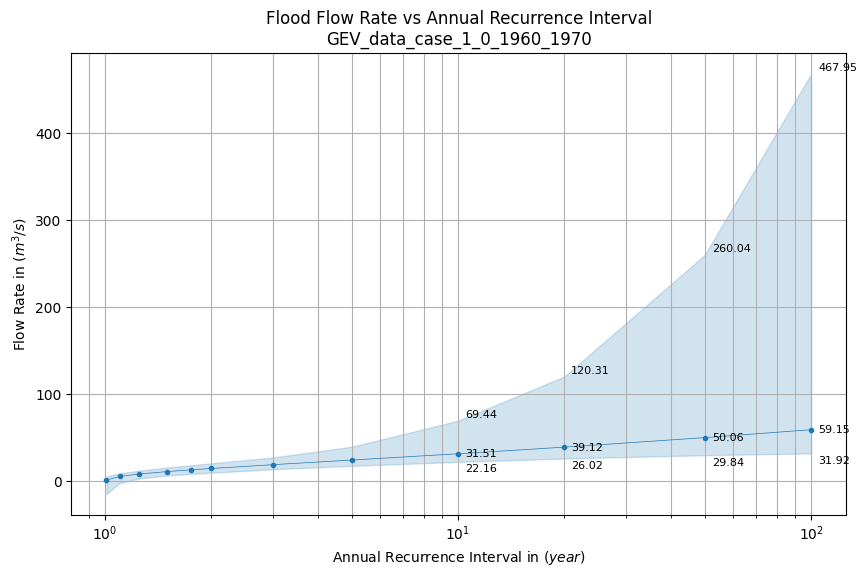

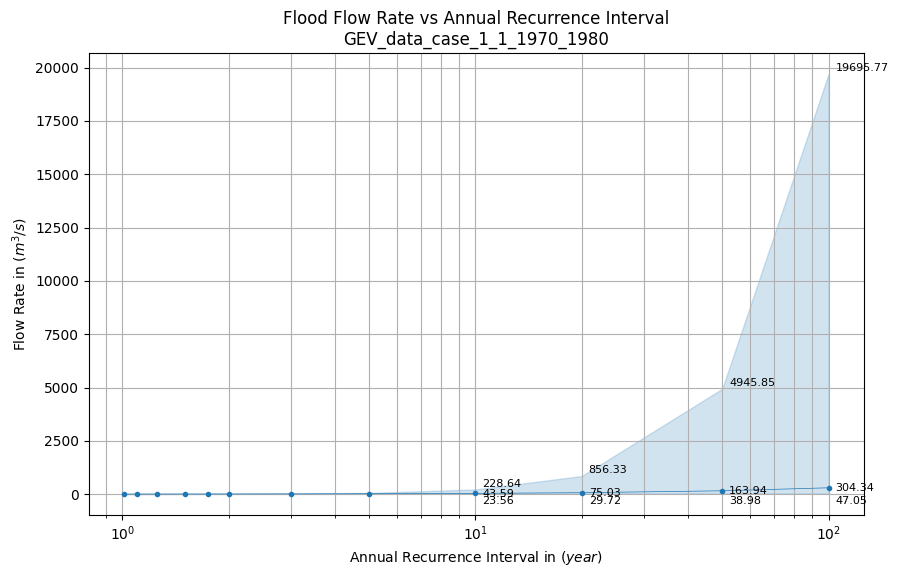

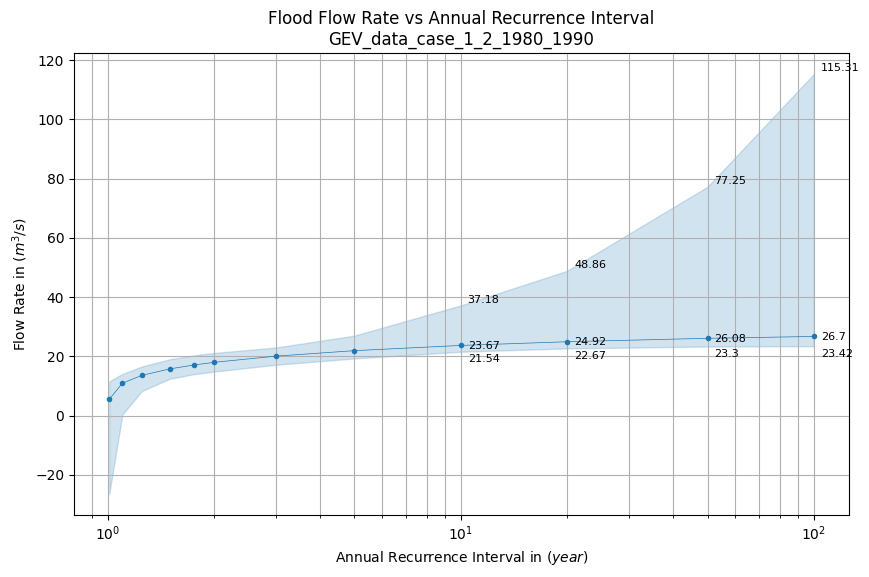

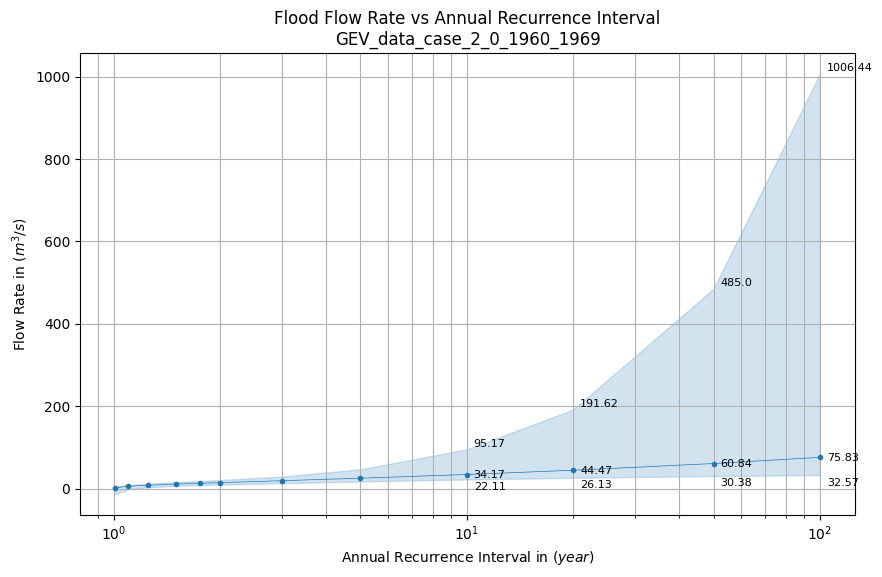

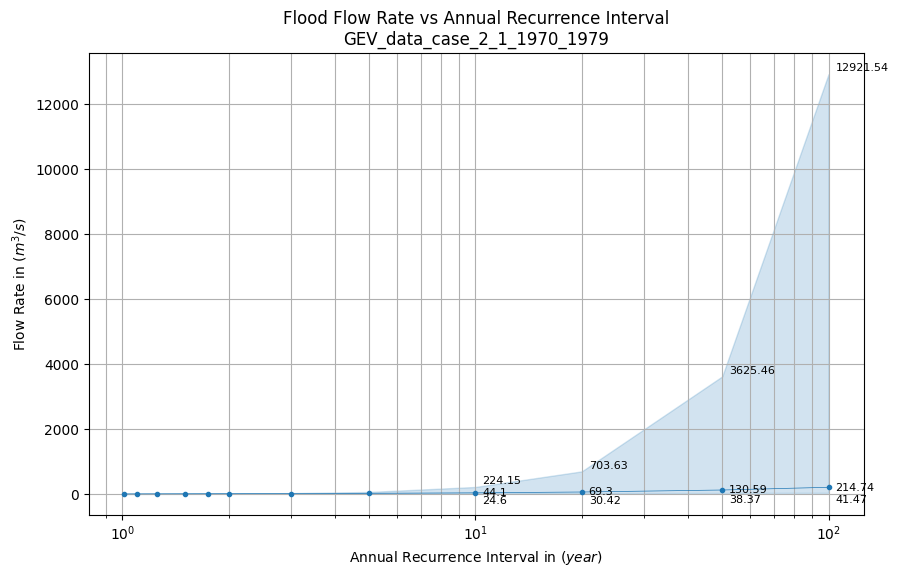

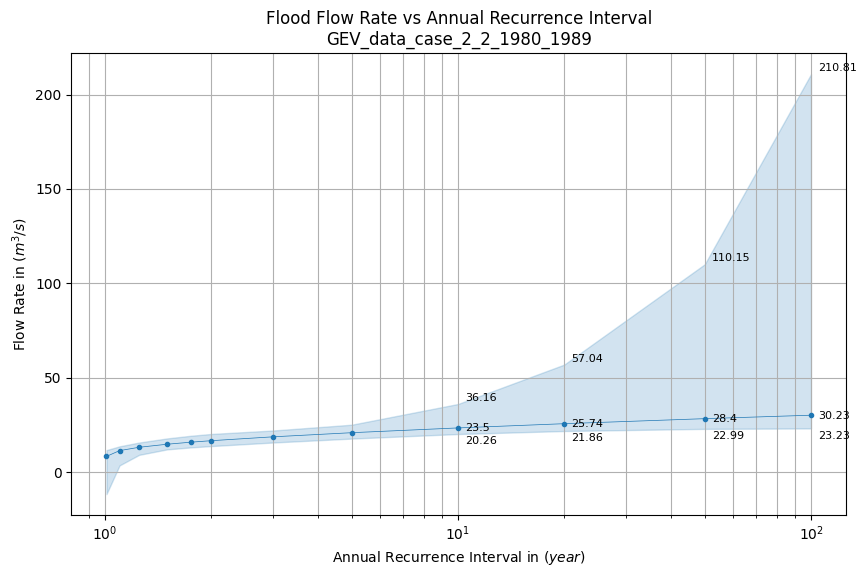

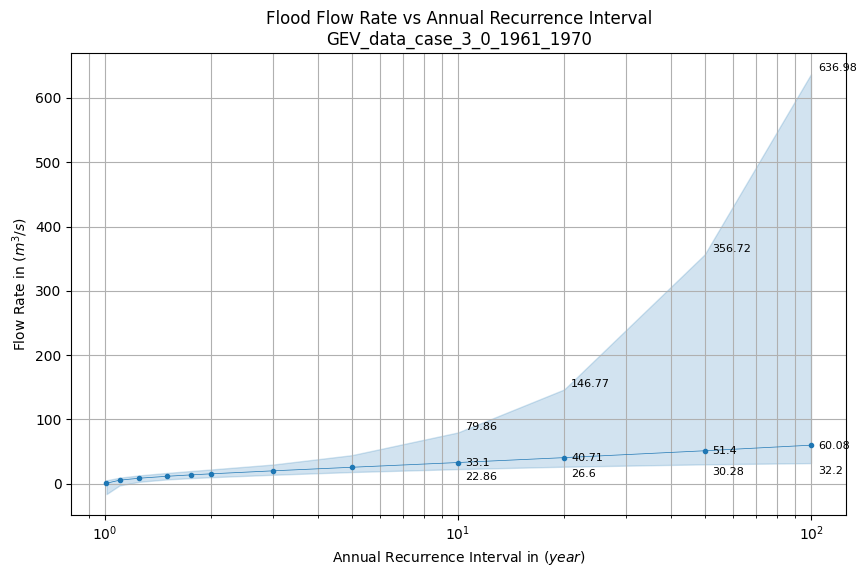

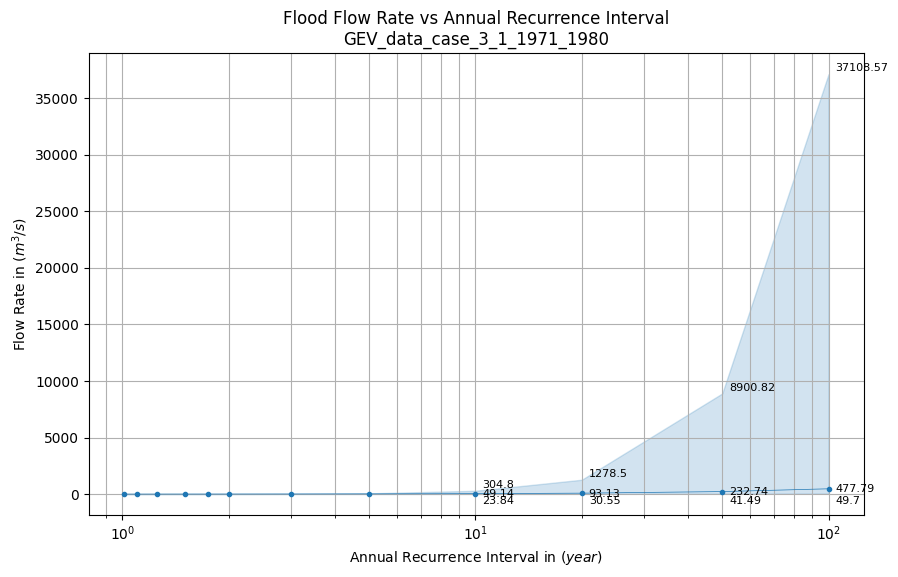

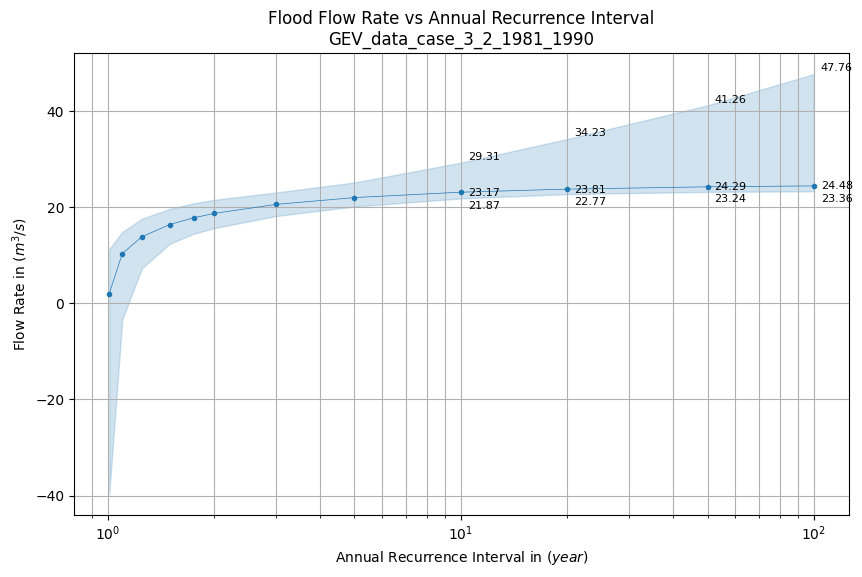

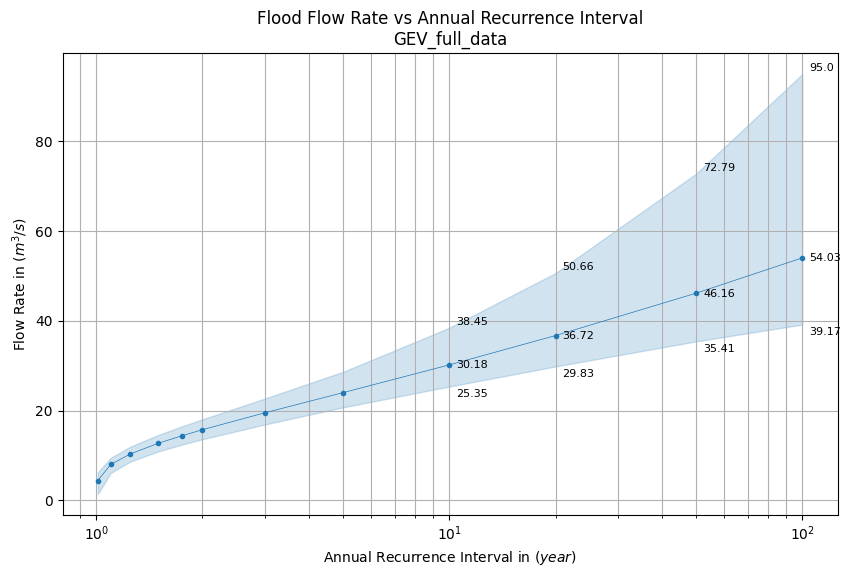

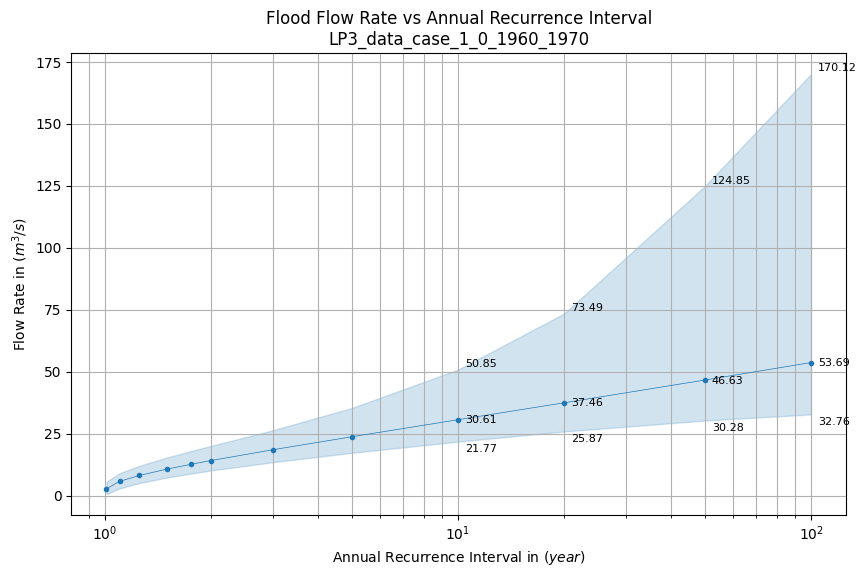

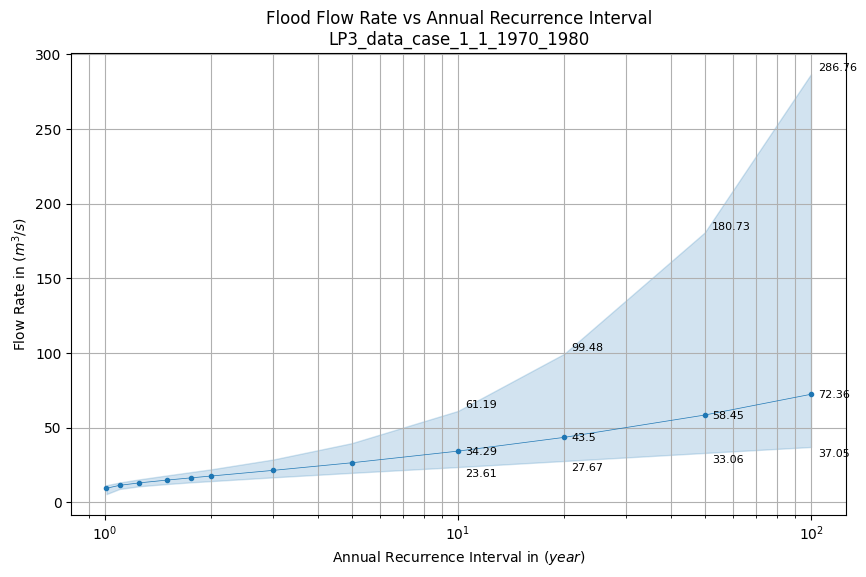

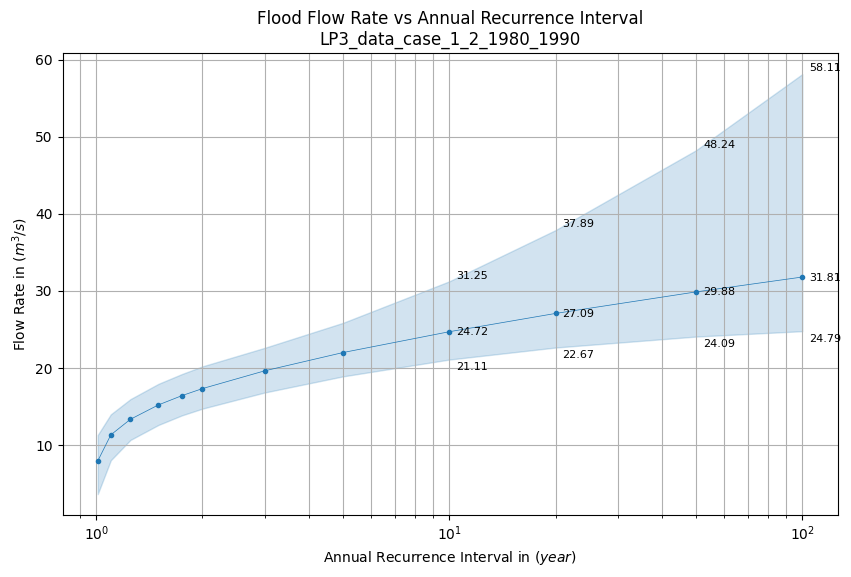

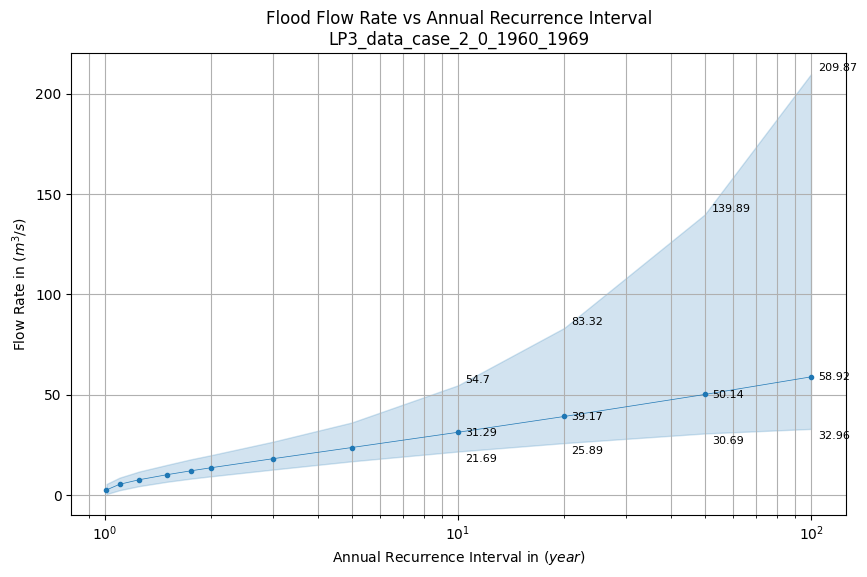

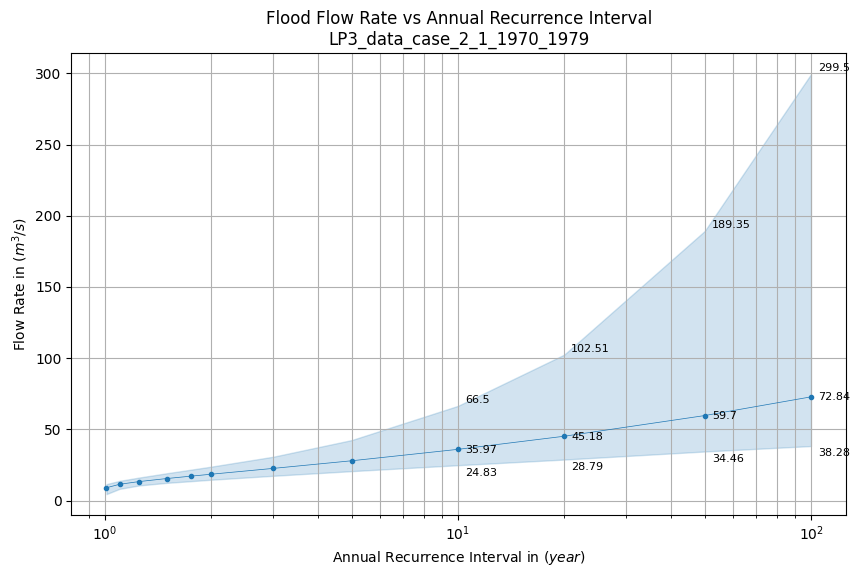

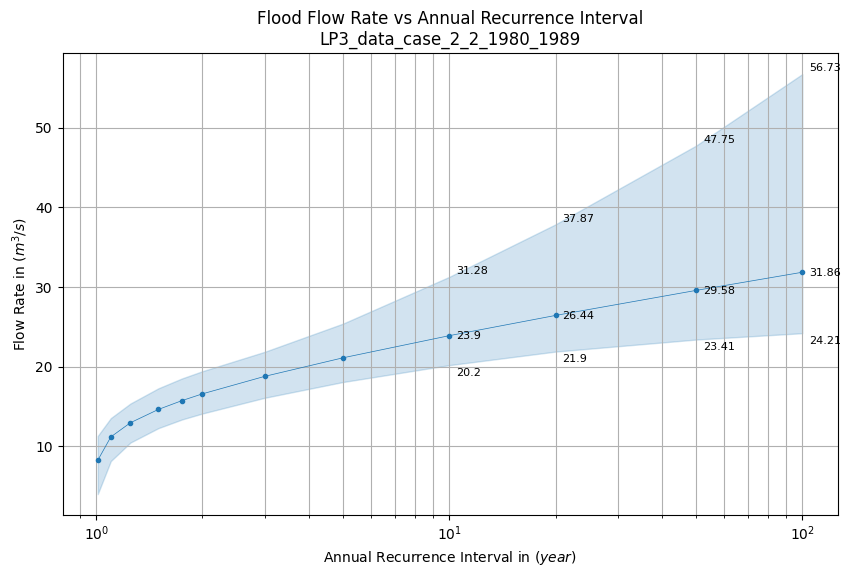

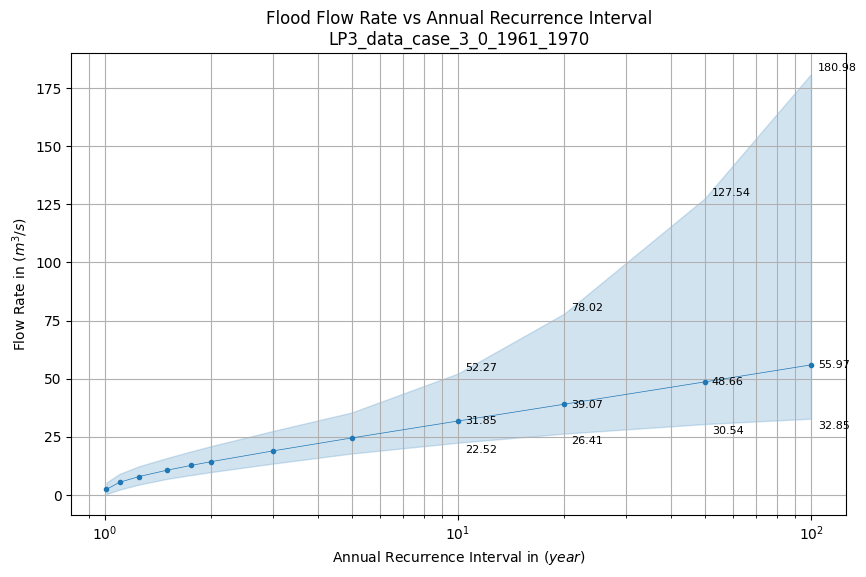

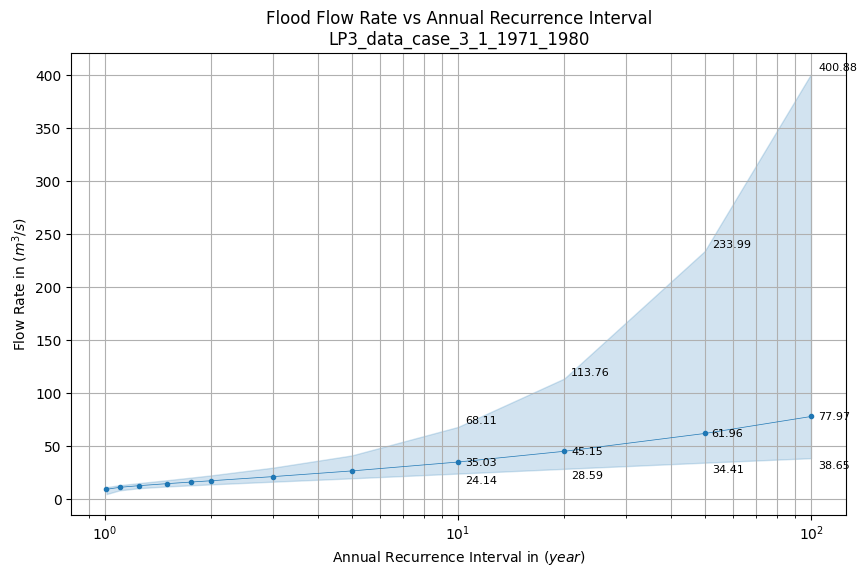

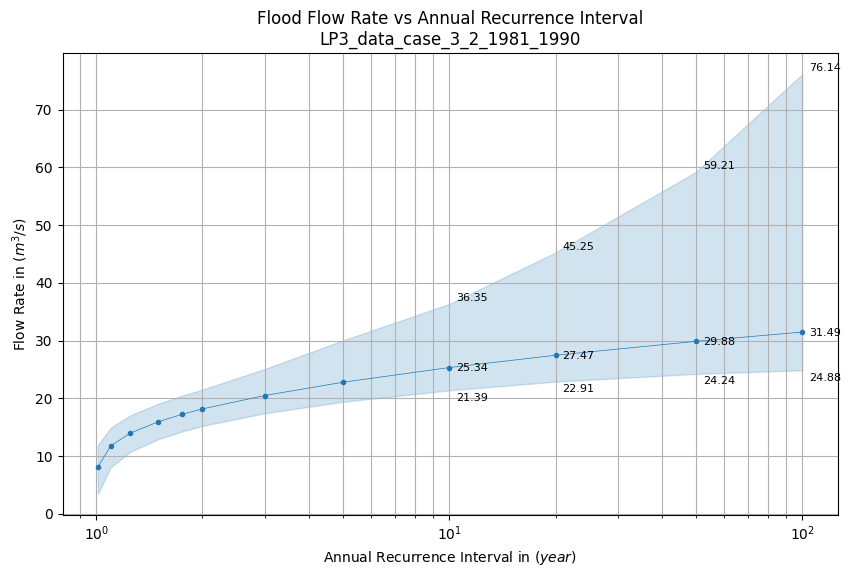

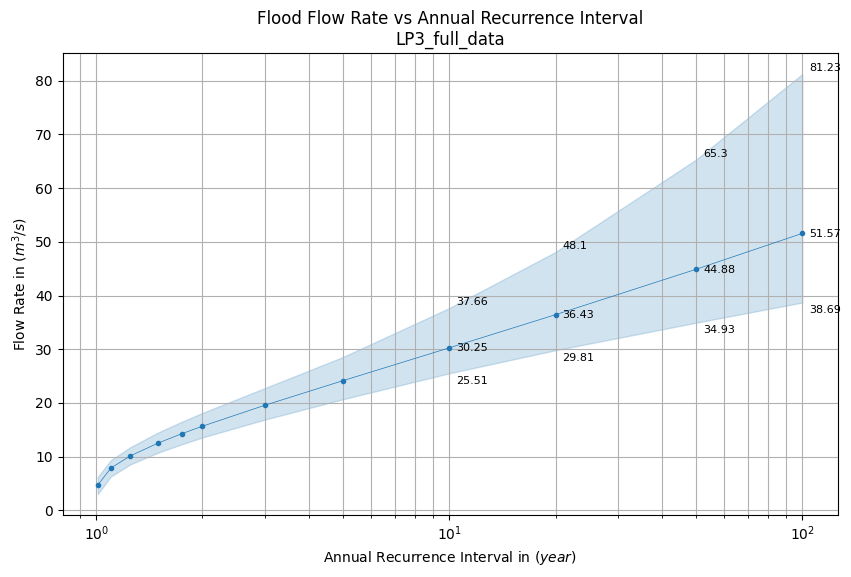

In [13]:
results.apply(func=lambda arg: plot_ffa(output_dir, arg.prob_fit, arg.data_case, arg.df, arg.df_data), axis=1)
results

In [14]:
results_GEV_full, results_LP3_full = results.iloc[:10,:], results.iloc[10:,:]
results_LP3_full.reset_index(drop=True, inplace=True)

results_GEV_full = [results_GEV_full.iloc[9:,:], results_GEV_full.iloc[:3,:], results_GEV_full.iloc[3:6,:], results_GEV_full.iloc[6:9,:]]
results_LP3_full = [results_LP3_full.iloc[9:,:], results_LP3_full.iloc[:3,:], results_LP3_full.iloc[3:6,:], results_LP3_full.iloc[6:9,:]]

results_GEV_full = [ind.reset_index(drop=True) for ind in results_GEV_full]
results_LP3_full = [ind.reset_index(drop=True) for ind in results_LP3_full]

results_GEV_full, results_GEV_c1, results_GEV_c2, results_GEV_c3 = results_GEV_full
results_LP3_full, results_LP3_c1, results_LP3_c2, results_LP3_c3 = results_LP3_full

print(results_GEV_full, results_GEV_c1, results_GEV_c2, results_GEV_c3, results_LP3_full, results_LP3_c1, results_LP3_c2, results_LP3_c3, sep='\n')

                                   file_name  data_case prob_fit  \
0  results__full_data__Bayes__NoInf__GEV.txt  full_data      GEV   

   skip_row_ind                                                 df  \
0           128         ARI  flow_rate  lower_5  upper_95  diff...   

                                             df_data  
0       ARI  flow_rate  lower_5  upper_95  diff_p...  
                                           file_name                data_case  \
0  results__data_case_1_0_1960_1970__Bayes__NoInf...  data_case_1_0_1960_1970   
1  results__data_case_1_1_1970_1980__Bayes__NoInf...  data_case_1_1_1970_1980   
2  results__data_case_1_2_1980_1990__Bayes__NoInf...  data_case_1_2_1980_1990   

  prob_fit  skip_row_ind                                                 df  \
0      GEV           100         ARI  flow_rate  lower_5  upper_95  diff...   
1      GEV            99         ARI  flow_rate  lower_5  upper_95  diff...   
2      GEV            99         ARI  flow_rate  l

In [15]:
results_GEV = [results_GEV_c1, results_GEV_c2, results_GEV_c3]
results_LP3 = [results_LP3_c1, results_LP3_c2, results_LP3_c3]

In [16]:
def plot_ffa_comparison(arg_output_dir, arg_df_full, arg_df_c1, arg_df_c2, arg_df_c3):

    data = [arg_df_full, arg_df_c1, arg_df_c2, arg_df_c3]
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    count = np.arange(stop=len(data))

    fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,16))

    for key, value, color in zip(count, data, colors):
        ax[key].plot(
            value.df.ARI.to_numpy(),
            value.df.flow_rate.to_numpy(),
            '-o',
            color=color,
            linewidth=0.5,
            markersize=2
            )

        ax[key].fill_between(
            x=value.df.ARI.to_numpy(),
            y1=value.df.upper_95.to_numpy(),
            y2=value.df.lower_5.to_numpy(),
            color=color,
            alpha=0.2
            )

        for ind1, ind2 in zip(value.df_data.ARI.to_numpy(), value.df_data.flow_rate.to_numpy()):
            ax[key].annotate(
                text=ind2,
                xy=(ind1, ind2),
                xytext=(5, -2.5),
                textcoords='offset points',
                fontsize=8
                )

        for ind1, ind2 in zip(value.df_data.ARI.to_numpy(), value.df_data.upper_95.to_numpy()):
            ax[key].annotate(
                text=ind2,
                xy=(ind1, ind2),
                xytext=(5, 2),
                textcoords='offset points',
                fontsize=8
                )

        for ind1, ind2 in zip(value.df_data.ARI.to_numpy(), value.df_data.lower_5.to_numpy()):
            ax[key].annotate(
                text=ind2,
                xy=(ind1, ind2),
                xytext=(5, -7.5),
                textcoords='offset points',
                fontsize=8
                )

        ax[key].grid(visible=True, which='both')
        ax[key].set_xscale(value='log')
        ax[key].set_title(label='{}_{}'.format(value.prob_fit, value.data_case), loc='left', fontdict={'fontsize':10})

    fig.suptitle(
        t='Flood Flow Rate vs Annual Recurrence Interval\n{} Probability Model - {}'.format(
            value.prob_fit, 
            value.data_case.rsplit(sep='_', maxsplit=3)[0]
            ), 
        x=0.5, 
        y=0.91
        )
    fig.supxlabel(t='Annual Recurrence Interval in ($year$)', x=0.5, y=0.08)
    fig.supylabel(t='Flow Rate in ($m^3/s$)', x=0.03, y=0.5)

    fig.savefig(
        fname='{}all_{}_plots_{}.png'.format(
            arg_output_dir, 
            value.prob_fit, 
            value.data_case.rsplit(sep='_', maxsplit=3)[0]
            ),
        bbox_inches='tight'
        )

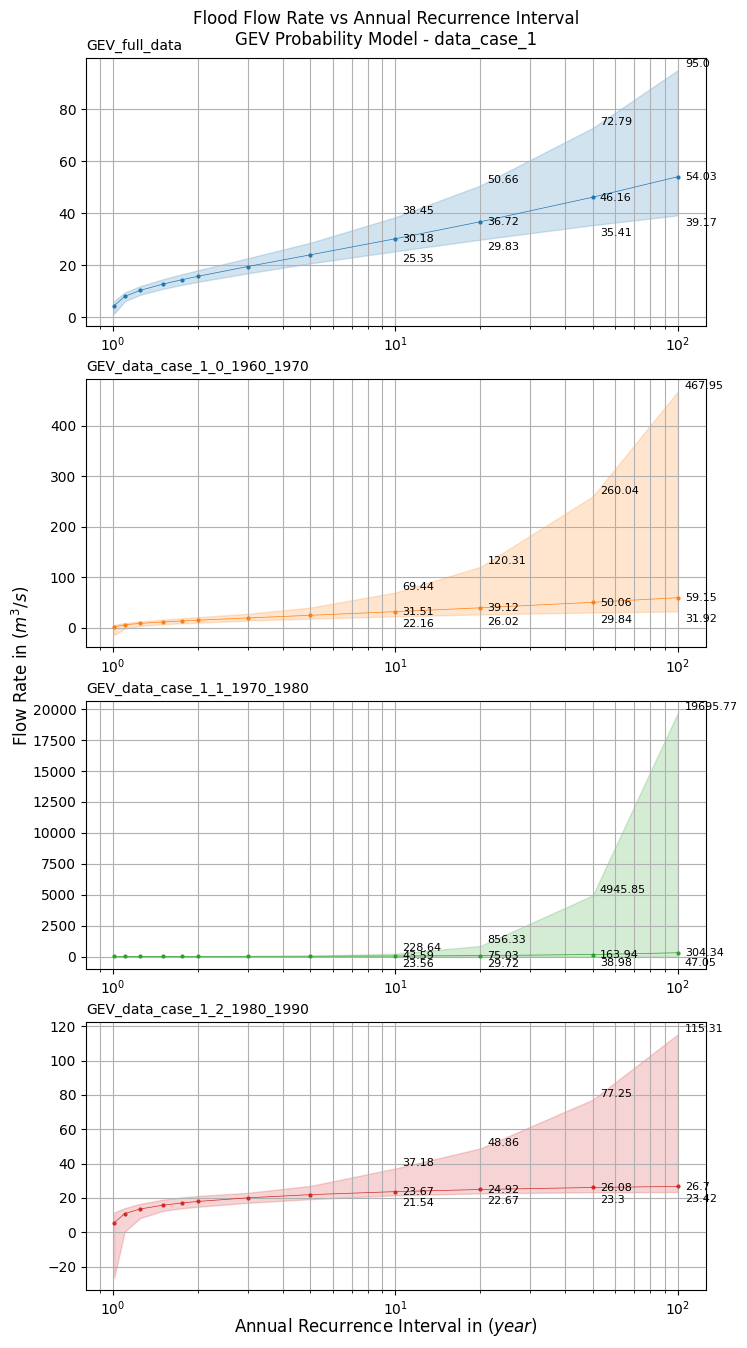

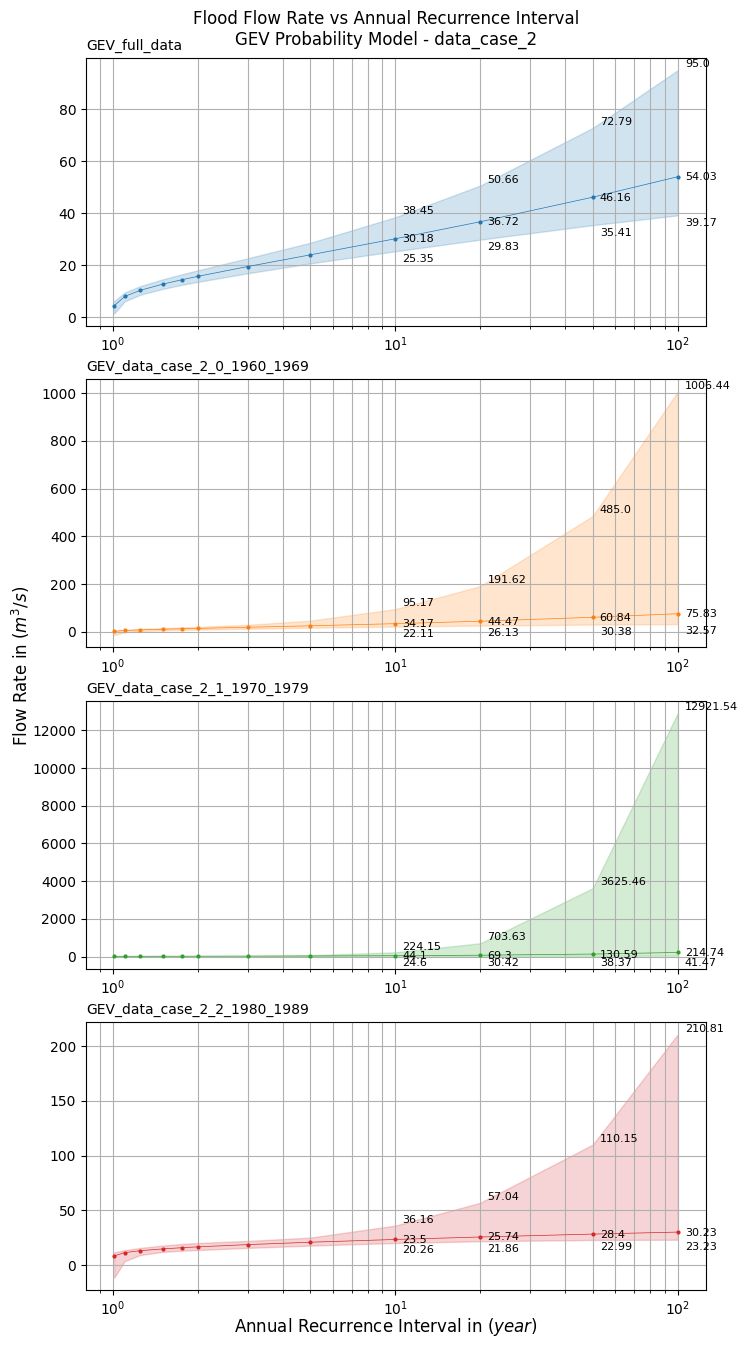

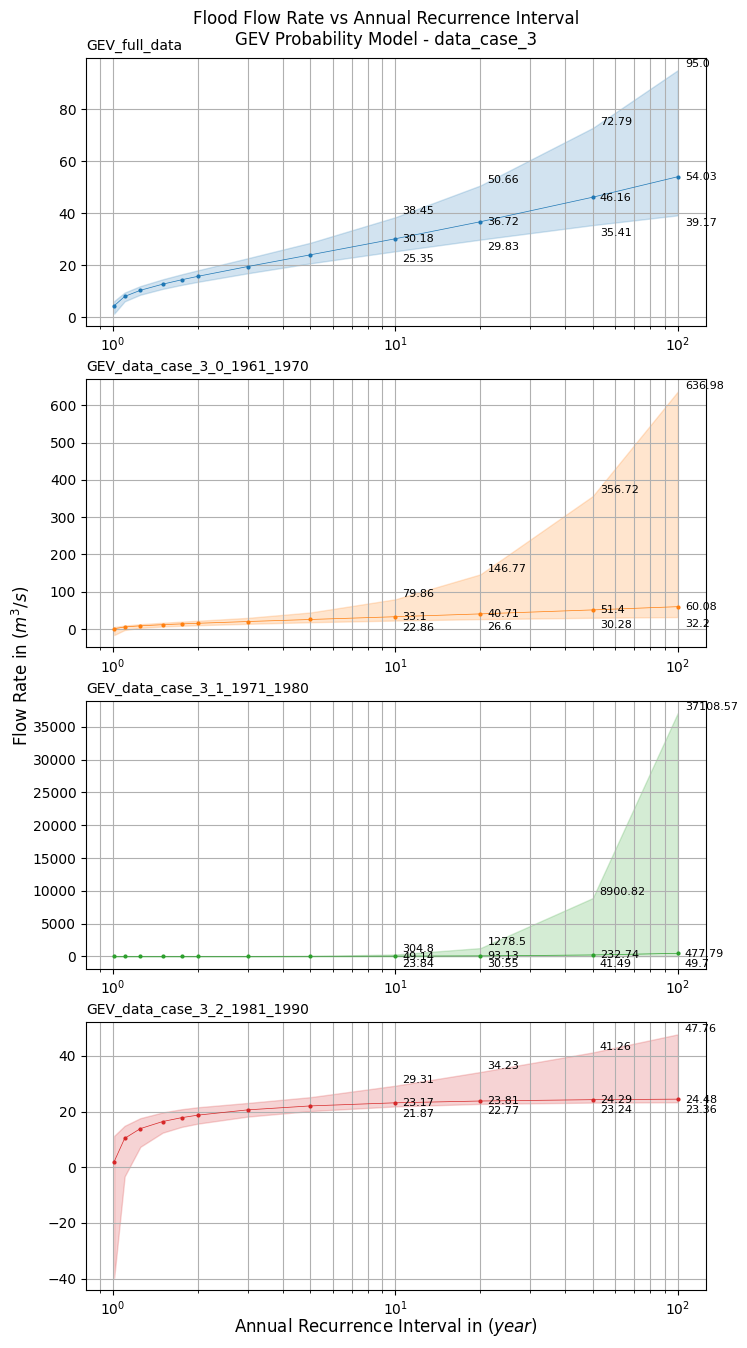

In [17]:
for ind1 in results_GEV:
    var = [output_dir, results_GEV_full.iloc[0]] + [ind2[1] for ind2 in ind1.iterrows()]
    plot_ffa_comparison(*var)

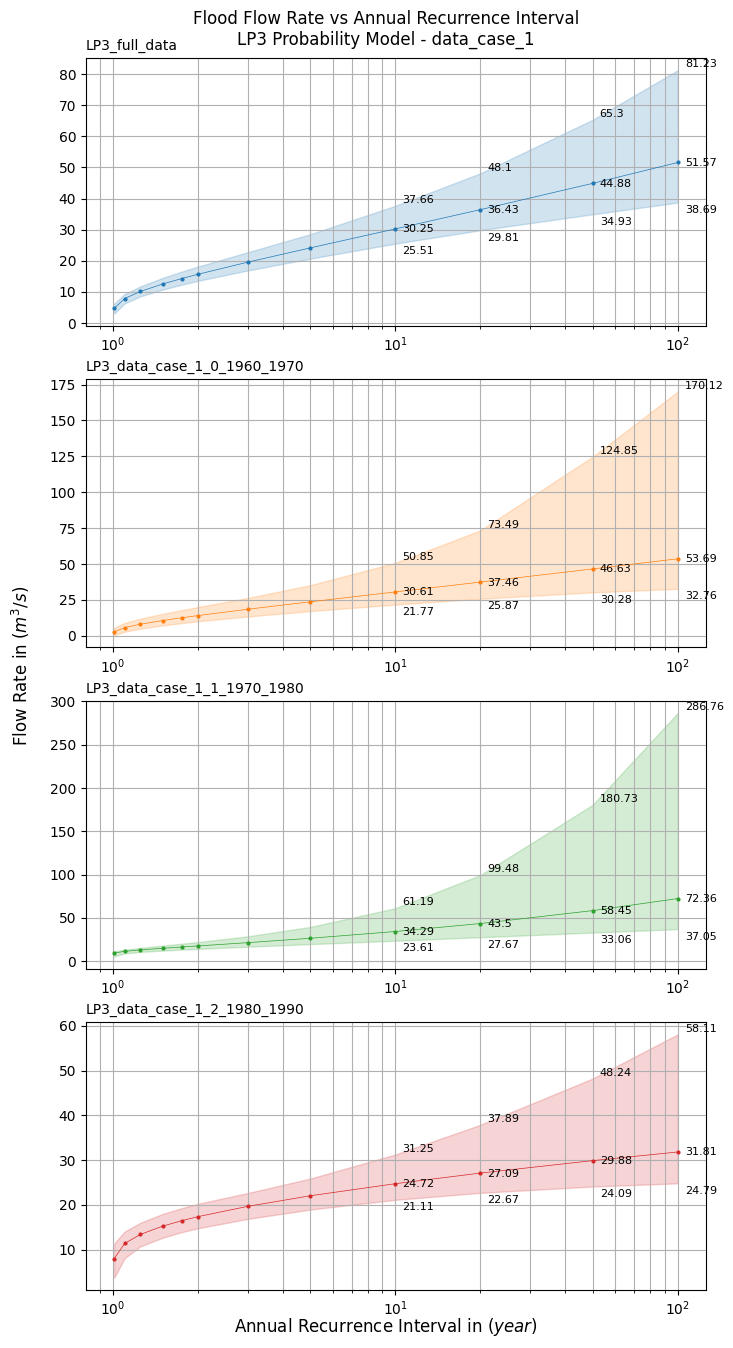

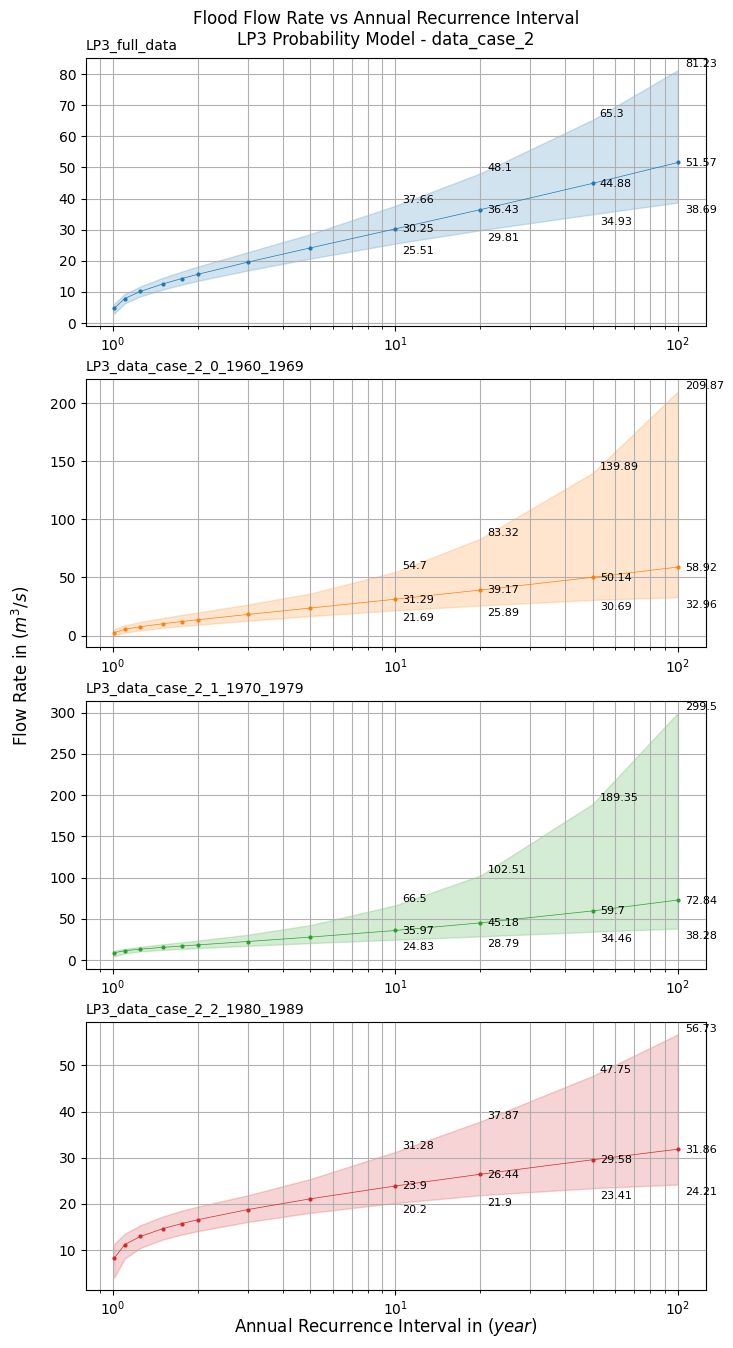

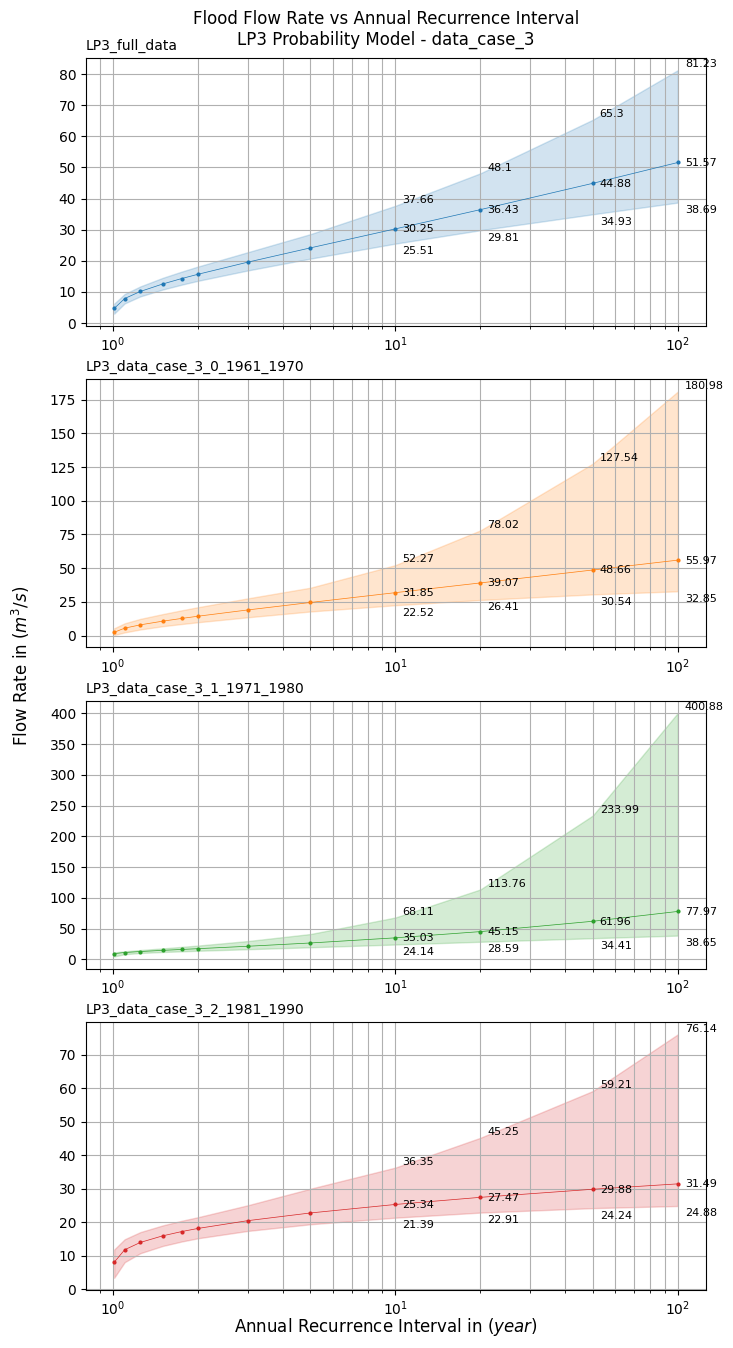

In [18]:
for ind1 in results_LP3:
    var = [output_dir, results_LP3_full.iloc[0]] + [ind2[1] for ind2 in ind1.iterrows()]
    plot_ffa_comparison(*var)

In [19]:
df_GEV = []

for ind in results_GEV:
    df = []
    for ind1, ind2, ind3 in zip(
        pd.concat(objs=[results_GEV_full.prob_fit, ind.prob_fit]), 
        pd.concat(objs=[results_GEV_full.data_case, ind.data_case]), 
        pd.concat(objs=[results_GEV_full.df_data, ind.df_data])
        ):
        ind3.index = pd.MultiIndex.from_arrays(arrays=[[ind1]*len(ind3), [ind2]*len(ind3)])
        df.append(ind3)
    df = pd.concat(objs=df)
    df.to_csv(path_or_buf='{}all_df_{}_{}.csv'.format(output_dir, ind1, ind2.rsplit(sep='_', maxsplit=3)[0]))
    df_GEV.append(df)

df_GEV

[                               ARI  flow_rate  lower_5  upper_95  \
 GEV full_data                 10.0      30.18    25.35     38.45   
     full_data                 20.0      36.72    29.83     50.66   
     full_data                 50.0      46.16    35.41     72.79   
     full_data                100.0      54.03    39.17     95.00   
     data_case_1_0_1960_1970   10.0      31.51    22.16     69.44   
     data_case_1_0_1960_1970   20.0      39.12    26.02    120.31   
     data_case_1_0_1960_1970   50.0      50.06    29.84    260.04   
     data_case_1_0_1960_1970  100.0      59.15    31.92    467.95   
     data_case_1_1_1970_1980   10.0      43.59    23.56    228.64   
     data_case_1_1_1970_1980   20.0      75.03    29.72    856.33   
     data_case_1_1_1970_1980   50.0     163.94    38.98   4945.85   
     data_case_1_1_1970_1980  100.0     304.34    47.05  19695.77   
     data_case_1_2_1980_1990   10.0      23.67    21.54     37.18   
     data_case_1_2_1980_1990   20.

In [20]:
df_LP3 = []

for ind in results_LP3:
    df = []
    for ind1, ind2, ind3 in zip(
        pd.concat(objs=[results_LP3_full.prob_fit, ind.prob_fit]), 
        pd.concat(objs=[results_LP3_full.data_case, ind.data_case]), 
        pd.concat(objs=[results_LP3_full.df_data, ind.df_data])
        ):
        ind3.index = pd.MultiIndex.from_arrays(arrays=[[ind1]*len(ind3), [ind2]*len(ind3)])
        df.append(ind3)
    df = pd.concat(objs=df)
    df.to_csv(path_or_buf='{}all_df_{}_{}.csv'.format(output_dir, ind1, ind2.rsplit(sep='_', maxsplit=3)[0]))
    df_LP3.append(df)

df_LP3

[                               ARI  flow_rate  lower_5  upper_95  \
 LP3 full_data                 10.0      30.25    25.51     37.66   
     full_data                 20.0      36.43    29.81     48.10   
     full_data                 50.0      44.88    34.93     65.30   
     full_data                100.0      51.57    38.69     81.23   
     data_case_1_0_1960_1970   10.0      30.61    21.77     50.85   
     data_case_1_0_1960_1970   20.0      37.46    25.87     73.49   
     data_case_1_0_1960_1970   50.0      46.63    30.28    124.85   
     data_case_1_0_1960_1970  100.0      53.69    32.76    170.12   
     data_case_1_1_1970_1980   10.0      34.29    23.61     61.19   
     data_case_1_1_1970_1980   20.0      43.50    27.67     99.48   
     data_case_1_1_1970_1980   50.0      58.45    33.06    180.73   
     data_case_1_1_1970_1980  100.0      72.36    37.05    286.76   
     data_case_1_2_1980_1990   10.0      24.72    21.11     31.25   
     data_case_1_2_1980_1990   20.